In [438]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
pd.set_option('future.no_silent_downcasting', True)

In [439]:
df = pd.read_csv('Telco_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [441]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [442]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)

categorical_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [443]:
print(f'Unique values:\n{df.nunique()}')

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [444]:
binary_cols = []
multi_class_cols = []

for col in categorical_cols:
    unique_vals = df[col].unique()
    if df[col].nunique() == 2:
        if set(unique_vals) == {'Yes','No'} or set(unique_vals) == {'No','Yes'}:
            binary_cols.append(col)
    elif df[col].nunique() > 5:
        multi_class_cols.append(col)

binary_cols

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [445]:
df[binary_cols] = df[binary_cols].replace({'Yes':1,'No':0})

In [446]:
df[df.duplicated]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [447]:
df['TotalCharges'] = df['TotalCharges'].replace({' ':0}).astype(float)

In [448]:
bins = [-1, 12, 24, float('inf')]
labels = ['New', 'Established', 'Long-Term']
df['Tenure_Group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

bins = [-1,25,50,75,100,float('inf')]
labels = ['0-25', '26-50', '51-75', '76-100', '100+']
df['ChargeGroup'] = pd.cut(df['MonthlyCharges'],bins=bins,labels=labels)

In [449]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group,ChargeGroup
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,New,26-50
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,No,No,One year,0,Mailed check,56.95,1889.50,0,Long-Term,51-75
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,New,51-75
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,Long-Term,26-50
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,New,51-75


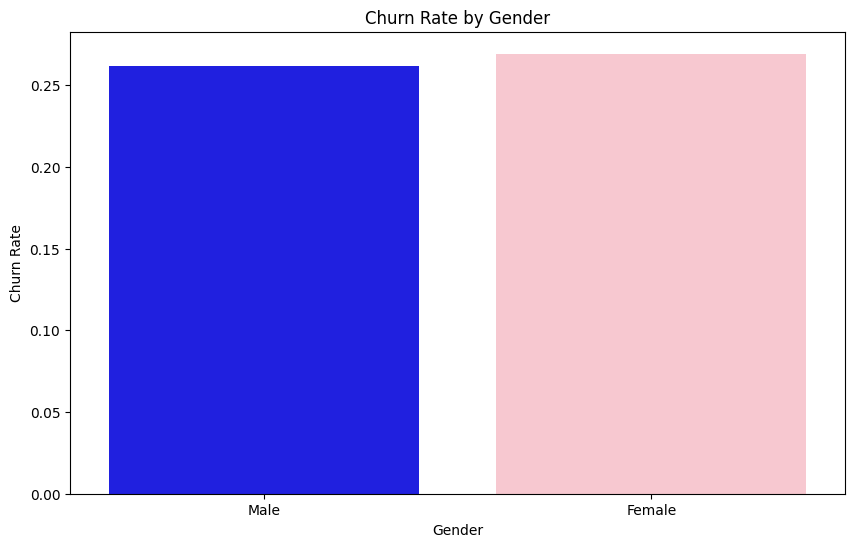

In [450]:
gender_churn = df.groupby('gender')['Churn'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=gender_churn, x='gender', y='Churn', order=['Male','Female'], 
            hue='gender', palette={'Male':'blue','Female':'pink'})
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender')
plt.show()

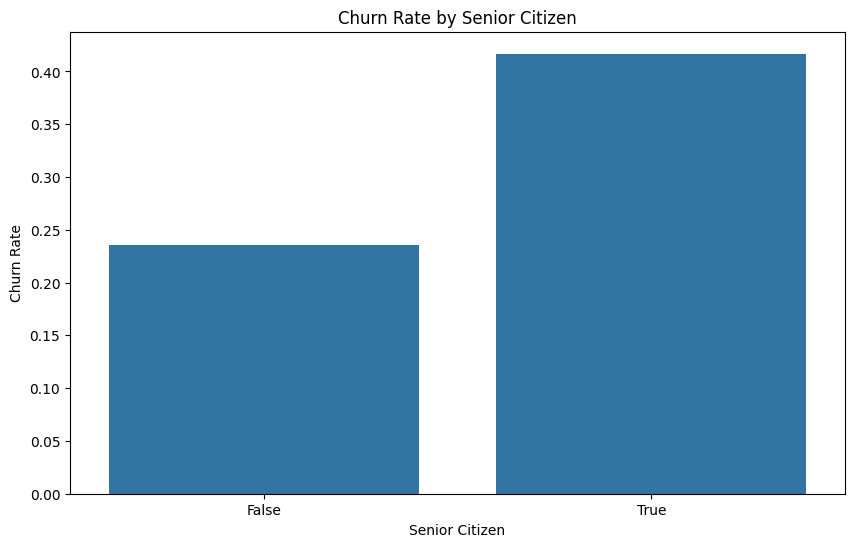

In [451]:
senior_citizen_churn = df.groupby('SeniorCitizen')['Churn'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=senior_citizen_churn, x='SeniorCitizen', y='Churn')
plt.title('Churn Rate by Senior Citizen')
plt.ylabel('Churn Rate')
plt.xlabel('Senior Citizen')
plt.xticks(ticks = [0,1], labels = ['False','True'])
plt.show()

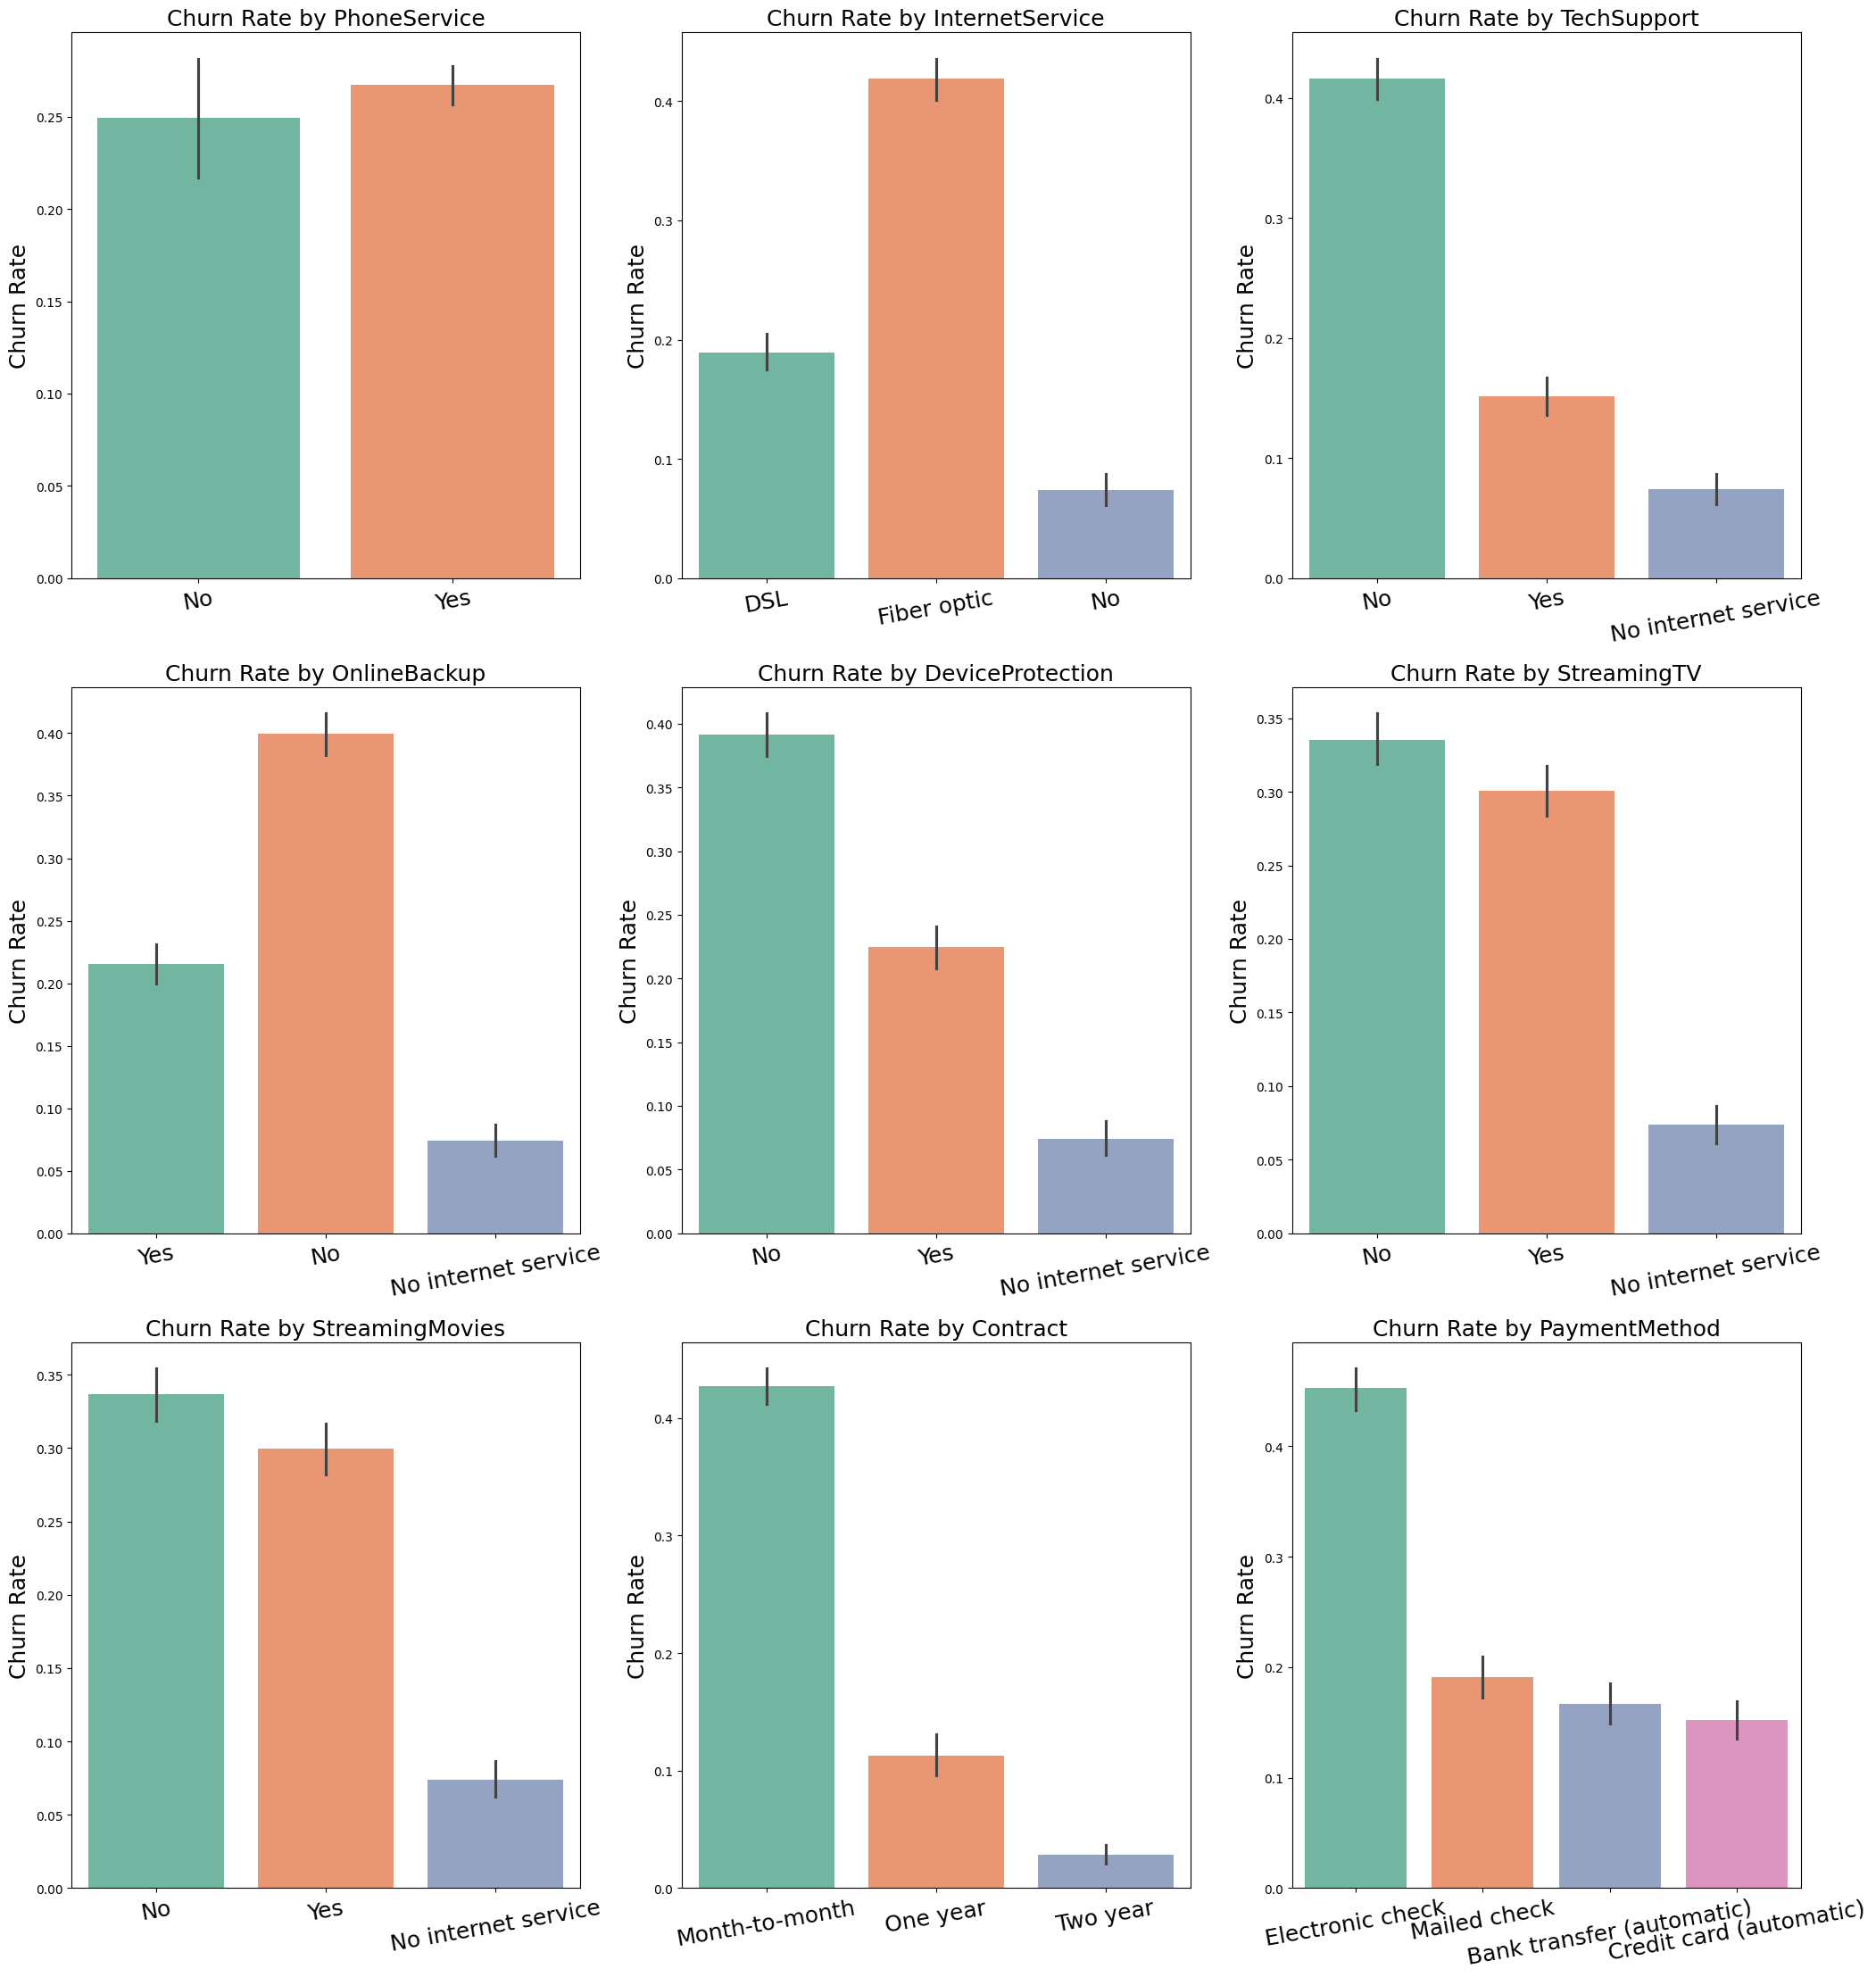

In [452]:
service_features = ['PhoneService','InternetService','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Contract','PaymentMethod']
df['PhoneService'] = df['PhoneService'].replace({0:'No',1:'Yes'})
plt.figure(figsize=(25,27))
for i, feature in enumerate(service_features,1):
    plt.subplot(3,3,i)
    sns.barplot(data=df, x=feature, y='Churn', hue=feature, palette='Set2')
    plt.title(f'Churn Rate by {feature}', fontsize=18)
    plt.ylabel('Churn Rate', fontsize=18)
    plt.xlabel(None)
    plt.xticks(rotation=10, fontsize=18)
plt.show()

In [453]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

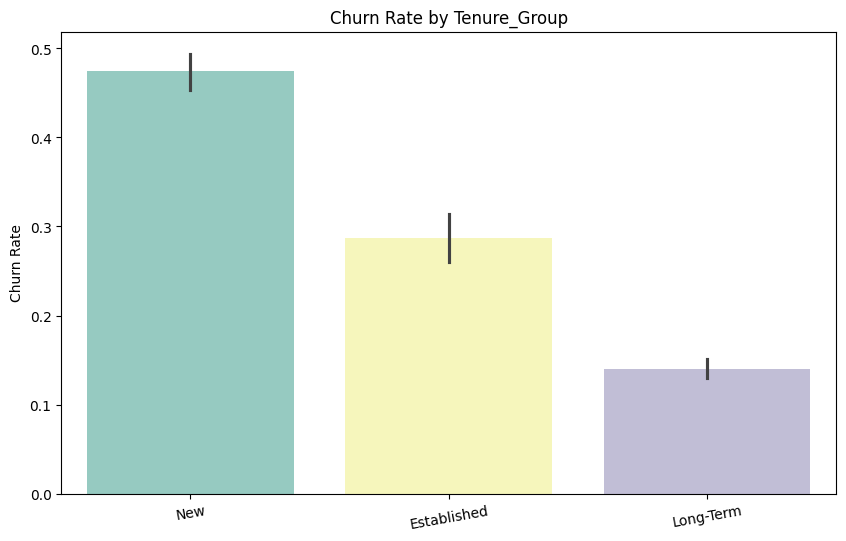

In [454]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Tenure_Group', y='Churn', hue='Tenure_Group', palette='Set3')
plt.title(f'Churn Rate by Tenure_Group')
plt.ylabel('Churn Rate')
plt.xlabel(None)
plt.xticks(rotation=10)
plt.show()

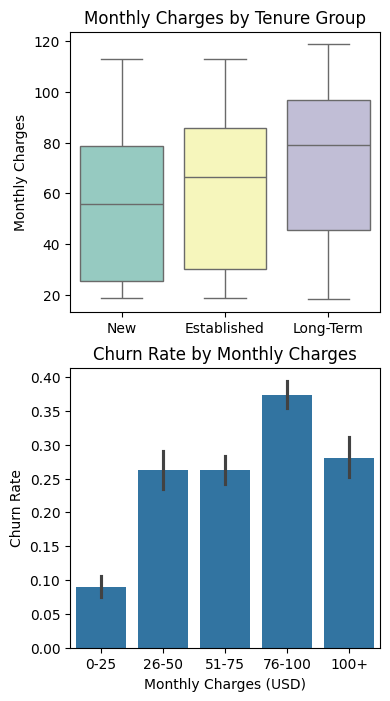

In [455]:
churn_rate=df.groupby('ChargeGroup', observed=True)['Churn'].mean().reset_index()
plt.figure(figsize=(4,8))
plt.subplot(2,1,1)
sns.boxplot(data=df, x='Tenure_Group', y='MonthlyCharges', hue='Tenure_Group',palette='Set3')
plt.title(f'Monthly Charges by Tenure Group')
plt.ylabel('Monthly Charges')
plt.xlabel(None)
plt.subplot(2,1,2)
sns.barplot(data=df,x='ChargeGroup',y='Churn')
plt.title('Churn Rate by Monthly Charges')
plt.xlabel('Monthly Charges (USD)')
plt.ylabel('Churn Rate')
plt.show()

In [456]:
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 1184.5965720837926
P-value: 5.863038300673391e-258
Degrees of Freedom: 2
Expected Frequencies:
 [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]
